In [267]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [268]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [269]:
NUM_CLASSES = 7

# Dataset reading

In [270]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21*2 + 21*2 + 2*1) + 1)))

In [271]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [273]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21*2 + 21*2 + 2*1 )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [274]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21*2 + 21*2 + 2*1, )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(200, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(76, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(10, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

In [275]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_26 (Dropout)        (None, 86)                0         
                                                                 
 dense_39 (Dense)            (None, 20)                1740      
                                                                 
 dropout_27 (Dropout)        (None, 20)                0         
                                                                 
 dense_40 (Dense)            (None, 10)                210       
                                                                 
 dense_41 (Dense)            (None, 7)                 77        
                                                                 
Total params: 2027 (7.92 KB)
Trainable params: 2027 (7.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [276]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [277]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [278]:
model.fit(
    X_train,
    y_train,
    epochs=100*NUM_CLASSES,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/700
1/6 [====>.........................] - ETA: 9s - loss: 2.0641 - accuracy: 0.1562
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 2s 115ms/step - loss: 1.9948 - accuracy: 0.1865 - val_loss: 1.9566 - val_accuracy: 0.1239
Epoch 2/700
1/6 [====>.........................] - ETA: 0s - loss: 1.9684 - accuracy: 0.1562
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5


C:\Users\Sanjay\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 37ms/step - loss: 1.9566 - accuracy: 0.1927 - val_loss: 1.9178 - val_accuracy: 0.1239
Epoch 3/700
1/6 [====>.........................] - ETA: 0s - loss: 1.9859 - accuracy: 0.1562
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 36ms/step - loss: 1.9329 - accuracy: 0.2125 - val_loss: 1.8820 - val_accuracy: 0.2844
Epoch 4/700
1/6 [====>.........................] - ETA: 0s - loss: 1.8887 - accuracy: 0.2188
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 36ms/step - loss: 1.8941 - accuracy: 0.2187 - val_loss: 1.8532 - val_accuracy: 0.3394
Epoch 5/700
1/6 [====>.........................] - ETA: 0s - loss: 1.9086 - accuracy: 0.2266
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 37ms/step - loss: 1.8683 - accuracy: 0.2462 - val_loss: 1.8302 - va

1/6 [====>.........................] - ETA: 0s - loss: 1.2914 - accuracy: 0.5156
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 36ms/step - loss: 1.2937 - accuracy: 0.4985 - val_loss: 1.1940 - val_accuracy: 0.5000
Epoch 31/700
1/6 [====>.........................] - ETA: 0s - loss: 1.3086 - accuracy: 0.4688
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 34ms/step - loss: 1.2806 - accuracy: 0.4801 - val_loss: 1.1721 - val_accuracy: 0.5046
Epoch 32/700
1/6 [====>.........................] - ETA: 0s - loss: 1.2533 - accuracy: 0.5391
Epoch 32: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 32ms/step - loss: 1.2465 - accuracy: 0.5107 - val_loss: 1.1507 - val_accuracy: 0.5046
Epoch 33/700
1/6 [====>.........................] - ETA: 0s - loss: 1.2803 - accuracy: 0.5078
Epoch 33: saving model

6/6 [==============================] - 0s 32ms/step - loss: 0.9436 - accuracy: 0.6544 - val_loss: 0.7044 - val_accuracy: 0.8624
Epoch 58/700
1/6 [====>.........................] - ETA: 0s - loss: 0.8318 - accuracy: 0.7188
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 33ms/step - loss: 0.9062 - accuracy: 0.6682 - val_loss: 0.6970 - val_accuracy: 0.8486
Epoch 59/700
1/6 [====>.........................] - ETA: 0s - loss: 0.8917 - accuracy: 0.7109
Epoch 59: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 37ms/step - loss: 0.9456 - accuracy: 0.6575 - val_loss: 0.6861 - val_accuracy: 0.8303
Epoch 60/700
1/6 [====>.........................] - ETA: 0s - loss: 0.8816 - accuracy: 0.7109
Epoch 60: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 34ms/step - loss: 0.8349 - accuracy: 0.7003 - val_loss: 0.675

Epoch 85/700
1/6 [====>.........................] - ETA: 0s - loss: 0.6193 - accuracy: 0.7734
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 35ms/step - loss: 0.6376 - accuracy: 0.8028 - val_loss: 0.4376 - val_accuracy: 0.9541
Epoch 86/700
1/6 [====>.........................] - ETA: 0s - loss: 0.6330 - accuracy: 0.7578
Epoch 86: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 38ms/step - loss: 0.7382 - accuracy: 0.7217 - val_loss: 0.4281 - val_accuracy: 0.9541
Epoch 87/700
1/6 [====>.........................] - ETA: 0s - loss: 0.6216 - accuracy: 0.7969
Epoch 87: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 37ms/step - loss: 0.6600 - accuracy: 0.7691 - val_loss: 0.4323 - val_accuracy: 0.9450
Epoch 88/700
1/6 [====>.........................] - ETA: 0s - loss: 0.6118 - accuracy: 0.7812
Epoch 88:

6/6 [==============================] - 0s 35ms/step - loss: 0.5146 - accuracy: 0.8196 - val_loss: 0.3289 - val_accuracy: 0.9587
Epoch 113/700
1/6 [====>.........................] - ETA: 0s - loss: 0.4702 - accuracy: 0.8203
Epoch 113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 36ms/step - loss: 0.5326 - accuracy: 0.8272 - val_loss: 0.3238 - val_accuracy: 0.9679
Epoch 114/700
1/6 [====>.........................] - ETA: 0s - loss: 0.5729 - accuracy: 0.7812
Epoch 114: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 38ms/step - loss: 0.5543 - accuracy: 0.8058 - val_loss: 0.3207 - val_accuracy: 0.9679
Epoch 115/700
1/6 [====>.........................] - ETA: 0s - loss: 0.5519 - accuracy: 0.8281
Epoch 115: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 40ms/step - loss: 0.5338 - accuracy: 0.8043 - val_loss:

Epoch 140/700
1/6 [====>.........................] - ETA: 0s - loss: 0.4025 - accuracy: 0.8438
Epoch 140: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 39ms/step - loss: 0.4880 - accuracy: 0.8303 - val_loss: 0.2769 - val_accuracy: 0.9771
Epoch 141/700
1/6 [====>.........................] - ETA: 0s - loss: 0.4354 - accuracy: 0.8750
Epoch 141: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 34ms/step - loss: 0.4668 - accuracy: 0.8471 - val_loss: 0.2767 - val_accuracy: 0.9771
Epoch 142/700
1/6 [====>.........................] - ETA: 0s - loss: 0.4456 - accuracy: 0.8359
Epoch 142: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 33ms/step - loss: 0.4696 - accuracy: 0.8440 - val_loss: 0.2691 - val_accuracy: 0.9771
Epoch 143/700
1/6 [====>.........................] - ETA: 0s - loss: 0.4972 - accuracy: 0.8359
Ep

1/6 [====>.........................] - ETA: 0s - loss: 0.3634 - accuracy: 0.9141
Epoch 167: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 33ms/step - loss: 0.4157 - accuracy: 0.8609 - val_loss: 0.2357 - val_accuracy: 0.9817
Epoch 168/700
1/6 [====>.........................] - ETA: 0s - loss: 0.3642 - accuracy: 0.8672
Epoch 168: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 32ms/step - loss: 0.4252 - accuracy: 0.8563 - val_loss: 0.2357 - val_accuracy: 0.9817
Epoch 169/700
1/6 [====>.........................] - ETA: 0s - loss: 0.4130 - accuracy: 0.8438
Epoch 169: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 35ms/step - loss: 0.3992 - accuracy: 0.8486 - val_loss: 0.2400 - val_accuracy: 0.9817
Epoch 170/700
1/6 [====>.........................] - ETA: 0s - loss: 0.3799 - accuracy: 0.8750
Epoch 170: savin

1/6 [====>.........................] - ETA: 0s - loss: 0.3452 - accuracy: 0.8828
Epoch 194: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 33ms/step - loss: 0.4046 - accuracy: 0.8700 - val_loss: 0.2193 - val_accuracy: 0.9817
Epoch 195/700
1/6 [====>.........................] - ETA: 0s - loss: 0.4506 - accuracy: 0.8516
Epoch 195: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 34ms/step - loss: 0.4187 - accuracy: 0.8578 - val_loss: 0.2180 - val_accuracy: 0.9817
Epoch 196/700
1/6 [====>.........................] - ETA: 0s - loss: 0.2938 - accuracy: 0.9297
Epoch 196: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 34ms/step - loss: 0.3557 - accuracy: 0.8884 - val_loss: 0.2160 - val_accuracy: 0.9817
Epoch 197/700
1/6 [====>.........................] - ETA: 0s - loss: 0.3129 - accuracy: 0.9375
Epoch 197: savin

1/6 [====>.........................] - ETA: 0s - loss: 0.4025 - accuracy: 0.8828
Epoch 221: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 37ms/step - loss: 0.3560 - accuracy: 0.8731 - val_loss: 0.2099 - val_accuracy: 0.9817
Epoch 222/700
1/6 [====>.........................] - ETA: 0s - loss: 0.4300 - accuracy: 0.8359
Epoch 222: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 37ms/step - loss: 0.3943 - accuracy: 0.8700 - val_loss: 0.2084 - val_accuracy: 0.9817
Epoch 223/700
1/6 [====>.........................] - ETA: 0s - loss: 0.2706 - accuracy: 0.9531
Epoch 223: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 41ms/step - loss: 0.3039 - accuracy: 0.9037 - val_loss: 0.2068 - val_accuracy: 0.9817
Epoch 224/700
1/6 [====>.........................] - ETA: 0s - loss: 0.2749 - accuracy: 0.9062
Epoch 224: savin

1/6 [====>.........................] - ETA: 0s - loss: 0.3766 - accuracy: 0.8750
Epoch 248: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 33ms/step - loss: 0.3248 - accuracy: 0.8960 - val_loss: 0.1987 - val_accuracy: 0.9817
Epoch 249/700
1/6 [====>.........................] - ETA: 0s - loss: 0.2873 - accuracy: 0.9062
Epoch 249: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 34ms/step - loss: 0.3358 - accuracy: 0.8869 - val_loss: 0.1966 - val_accuracy: 0.9817
Epoch 250/700
1/6 [====>.........................] - ETA: 0s - loss: 0.3343 - accuracy: 0.8906
Epoch 250: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 36ms/step - loss: 0.3066 - accuracy: 0.9021 - val_loss: 0.1943 - val_accuracy: 0.9817
Epoch 251/700
1/6 [====>.........................] - ETA: 0s - loss: 0.3262 - accuracy: 0.8828
Epoch 251: savin

1/6 [====>.........................] - ETA: 0s - loss: 0.3271 - accuracy: 0.8906
Epoch 275: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 37ms/step - loss: 0.3069 - accuracy: 0.9052 - val_loss: 0.1886 - val_accuracy: 0.9817
Epoch 276/700
1/6 [====>.........................] - ETA: 0s - loss: 0.3271 - accuracy: 0.8984
Epoch 276: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 37ms/step - loss: 0.3323 - accuracy: 0.8823 - val_loss: 0.1900 - val_accuracy: 0.9817
Epoch 277/700
1/6 [====>.........................] - ETA: 0s - loss: 0.3518 - accuracy: 0.8828
Epoch 277: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 38ms/step - loss: 0.3070 - accuracy: 0.9067 - val_loss: 0.1921 - val_accuracy: 0.9817
Epoch 278/700
1/6 [====>.........................] - ETA: 0s - loss: 0.3422 - accuracy: 0.8828
Epoch 278: savin

1/6 [====>.........................] - ETA: 0s - loss: 0.2159 - accuracy: 0.9375
Epoch 302: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 37ms/step - loss: 0.2518 - accuracy: 0.9266 - val_loss: 0.1959 - val_accuracy: 0.9817
Epoch 303/700
1/6 [====>.........................] - ETA: 0s - loss: 0.2978 - accuracy: 0.8984
Epoch 303: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 36ms/step - loss: 0.2767 - accuracy: 0.9113 - val_loss: 0.1954 - val_accuracy: 0.9817
Epoch 304/700
1/6 [====>.........................] - ETA: 0s - loss: 0.3100 - accuracy: 0.8984
Epoch 304: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
6/6 [==============================] - 0s 35ms/step - loss: 0.2751 - accuracy: 0.9159 - val_loss: 0.1958 - val_accuracy: 0.9817
Epoch 305/700
1/6 [====>.........................] - ETA: 0s - loss: 0.2142 - accuracy: 0.9609
Epoch 305: savin

In [279]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 17ms/step - loss: 0.1932 - accuracy: 0.9817


In [280]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [281]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 165ms/step
[2.7176549e-04 3.2237452e-04 2.5078089e-05 3.8773753e-04 9.9865168e-01
 3.4126223e-04 1.5721972e-07]
4


# Confusion matrix

7/7 [==============================] - 0s 3ms/step


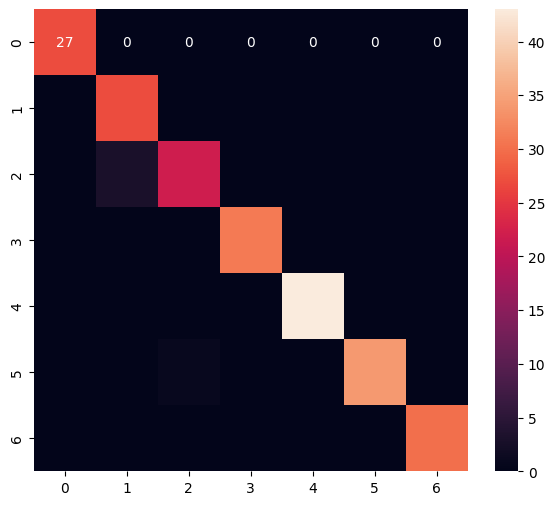

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.90      1.00      0.95        27
           2       0.96      0.88      0.92        25
           3       1.00      1.00      1.00        31
           4       1.00      1.00      1.00        43
           5       1.00      0.97      0.99        35
           6       1.00      1.00      1.00        30

    accuracy                           0.98       218
   macro avg       0.98      0.98      0.98       218
weighted avg       0.98      0.98      0.98       218



In [282]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [283]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\Sanjay\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [284]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Sanjay\AppData\Local\Temp\tmp1j08eoc9\assets


INFO:tensorflow:Assets written to: C:\Users\Sanjay\AppData\Local\Temp\tmp1j08eoc9\assets


5216

# Inference test

In [285]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [286]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [287]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [288]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [289]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.6090530e-04 2.9344697e-04 2.4170575e-05 3.5936243e-04 9.9871564e-01
 3.4643029e-04 1.3971270e-07]
4
